# Hierarchical Bayesian model of binary choice

Imagine a world where everyone chooses whether or not to open their windows. This choice is random, but the probability has some regional influence.

In [1]:
from scipy import stats
import numpy as np
import pymc3 as pm

np.random.seed(434)

## Data
I make synthetic data:

In [2]:
# SECRET constants are the true population distribution that we can never know
SECRET_A = 2
SECRET_B = 5
SECRET_P_DIST = stats.beta(SECRET_A, SECRET_B)

In [3]:
REGIONS = ["North", "South", "East", "West"]

In [4]:
SECRET_P = SECRET_P_DIST.rvs(len(REGIONS))
SECRET_P

array([0.14360561, 0.07236543, 0.25310767, 0.32047349])

In [5]:
N_OBS = [150, 100, 50, 10]

In [6]:
observed_counts = [stats.binom.rvs(n, p) for n, p in zip(N_OBS, SECRET_P)]
observed_counts

[14, 6, 12, 3]

Sanity check that simulated observations make sense:

In [7]:
np.array(observed_counts)/np.array(N_OBS)

array([0.09333333, 0.06      , 0.24      , 0.3       ])

Outside of this section, we cannot use SECRET variables because they are the true parameters we can never know exactly.

# Model
Based on https://docs.pymc.io/notebooks/GLM-hierarchical-binominal-model.html

In [8]:
with pm.Model() as model:
    # see e.g. https://arxiv.org/abs/1104.4937 for support of half Cauchy priors
    a = pm.HalfCauchy("a", beta=2)
    b = pm.HalfCauchy("b", beta=2)

    theta = pm.Beta('theta', alpha=a, beta=b, shape=len(REGIONS))

    p = pm.Binomial('p', p=theta, observed=observed_counts, n=N_OBS)
    trace = pm.sample(5000, tune=1000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, b, a]
Sampling 4 chains: 100%|████████████████████████████████████████████████████| 24000/24000 [00:11<00:00, 2094.26draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Immanuel\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argu

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C80A8BF60>,
      dtype=object)

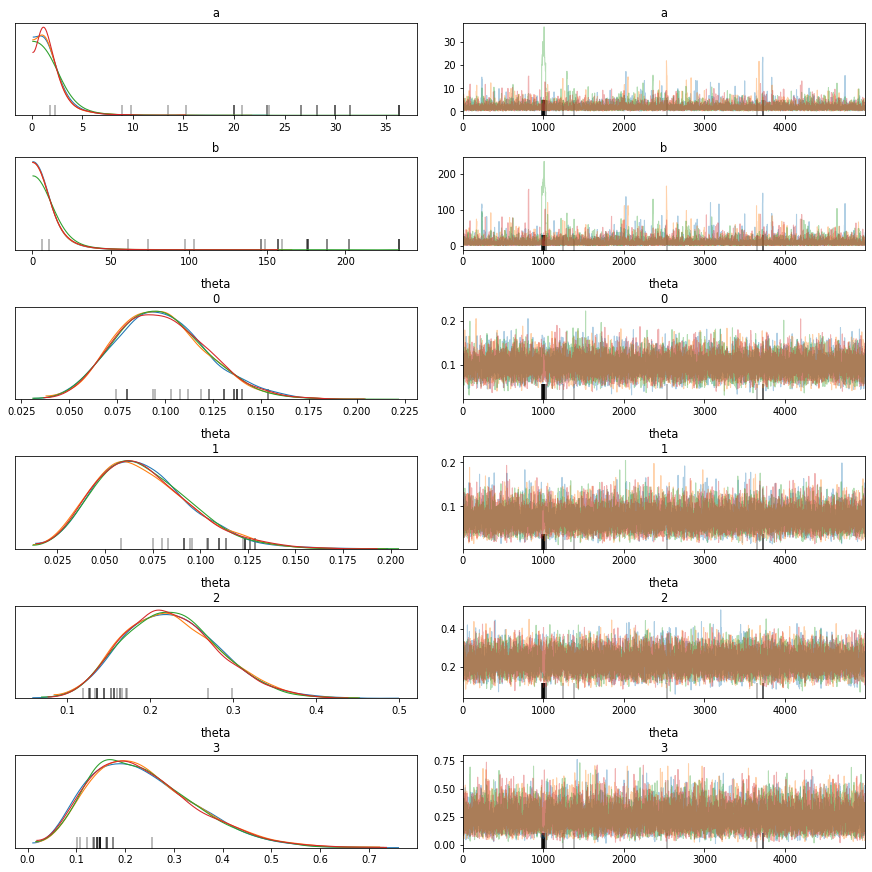

In [9]:
pm.traceplot(trace)